In [10]:
#pip install -U imbalanced-learn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install imblearn
#pip install imbalanced-learn

#!pip install imbalanced-learn==0.6.0
#!pip install scikit-learn==0.22.1
#sudo pip3 install imblearn


In [11]:
df = pd.read_csv("customer_dataset.csv")

In [12]:
df.shape

(396030, 27)

In [13]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [14]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [16]:
df.isnull().sum()/df.count()*100

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_title                6.144952
emp_length               4.845008
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
title                    0.445121
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.069740
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.550337
pub_rec_bankruptcies     0.135274
address                  0.000000
dtype: float64

In [17]:
ls = {"Name of col":[],"unique val":[]};
k = list(df.columns)
for i in k:
    if df[i].dtype == 'object':
        ls["Name of col"].append(i)
        ls['unique val'].append(df[i].nunique())

In [18]:
pd.DataFrame(ls)


Name of col  unique val
0                  term           2
1                 grade           7
2             sub_grade          35
3             emp_title      173105
4            emp_length          11
5        home_ownership           6
6   verification_status           3
7               issue_d         115
8           loan_status           2
9               purpose          14
10                title       48817
11     earliest_cr_line         684
12  initial_list_status           2
13     application_type           3
14              address      393700

In [19]:
df.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [20]:
#df.describe(type = "object")

In [21]:
df['loan_status'].value_counts()/df['loan_status'].count()*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [22]:
#imbalance 
#here the target variable is imbalance sowe may further have to take steps  
#to balance the dataset using(either weight concept or SMOT) 

C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

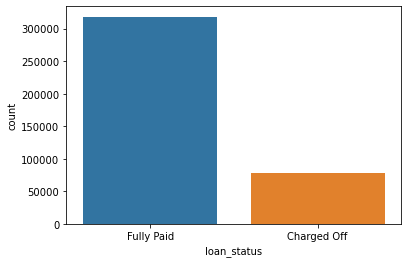

In [23]:
sns.countplot(df['loan_status'])

In [24]:
cols = list(df.columns)

In [25]:
cols


['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address']

In [26]:
print(cols)
df = df.drop(columns=['emp_title','title','address'])
cols = list(df.columns)
print(cols)

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


In [27]:
cols_cat=[]
cols_con=[]
for c in cols:
    if df[c].dtype == "object":
        cols_cat.append(c)
    else:
        cols_con.append(c)
print(cols_cat)
print(cols_con)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type']
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [28]:
#for i in range(len(cols_con)):
 #   sns.distplot(ax=axes[i,0],x=df[col[i]])
  #  sns.boxplot(ax=axes[i,1],)

C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\li

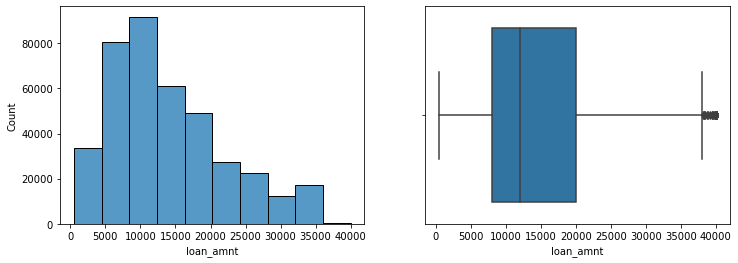

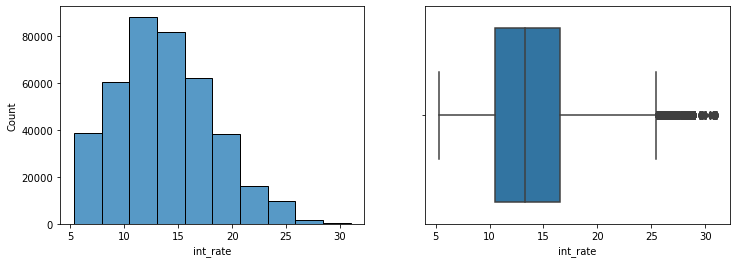

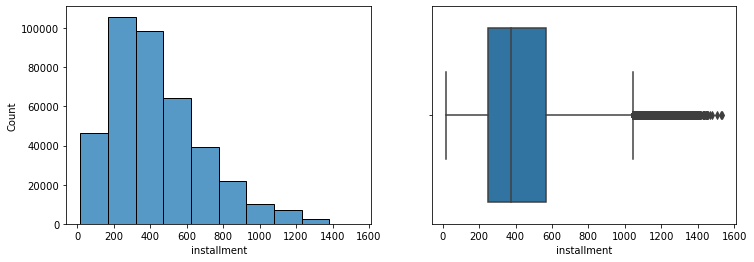

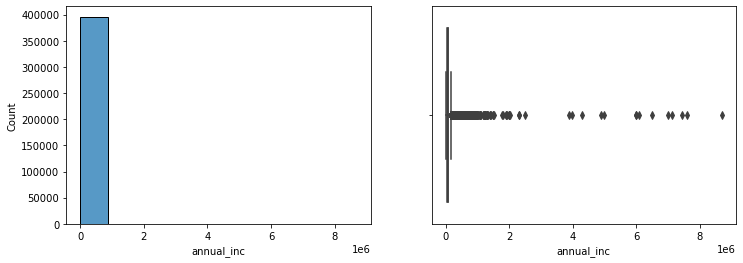

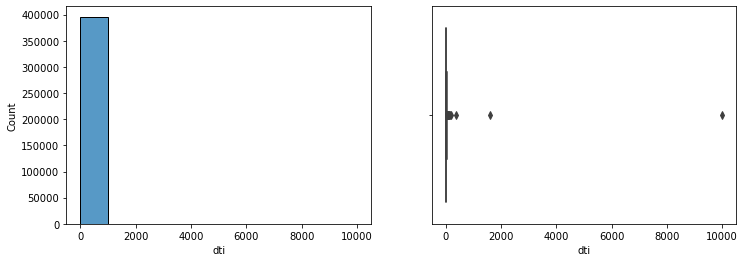

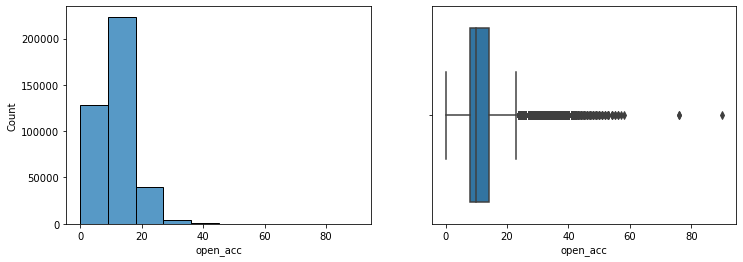

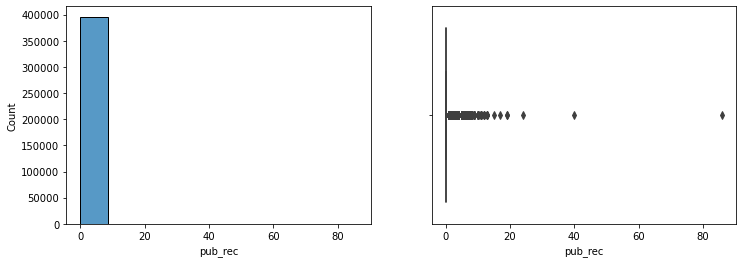

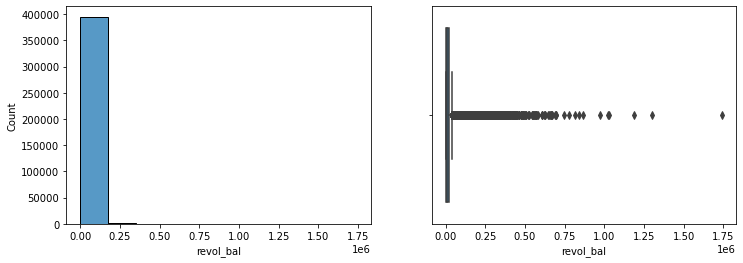

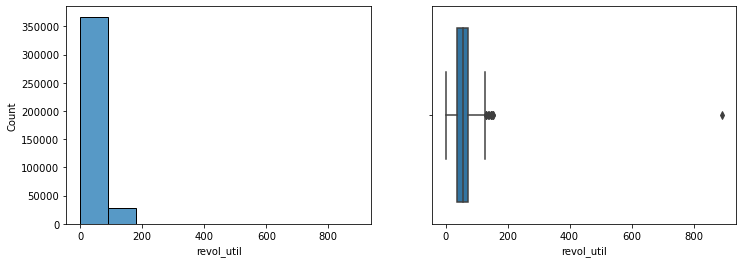

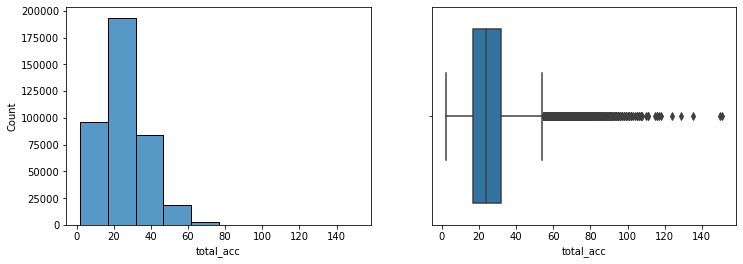

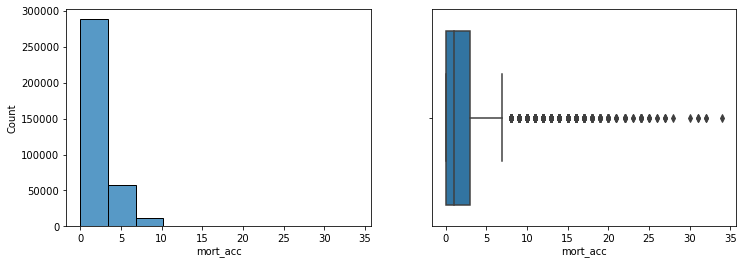

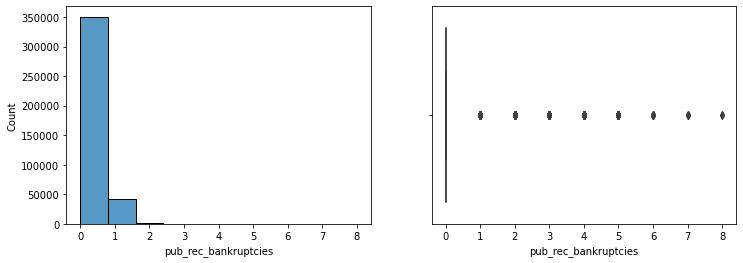

In [29]:
for i in cols_con:
    fig,axes =plt.subplots(1,2,figsize=(12,4))
    sns.histplot(df[i], bins = 10, ax=axes[0])
    sns.boxplot(df[i], ax=axes[1])



C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\li

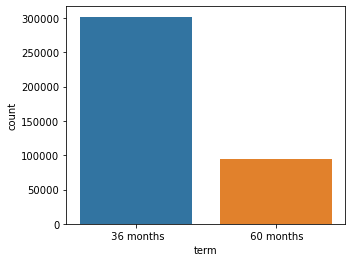

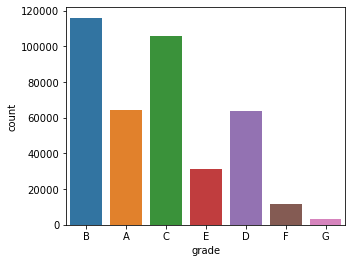

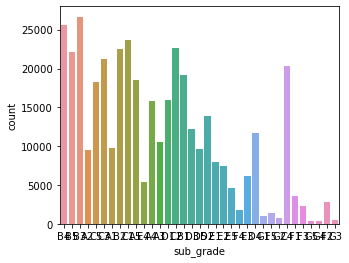

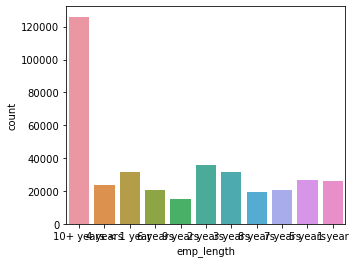

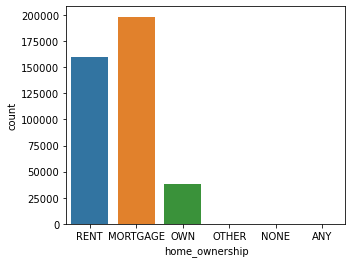

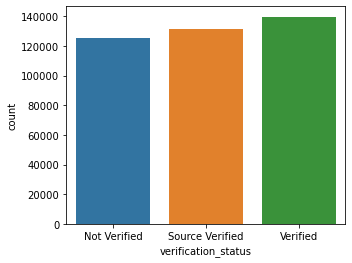

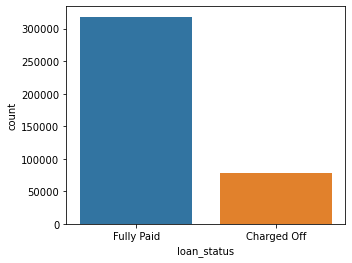

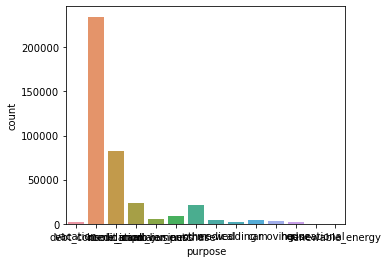

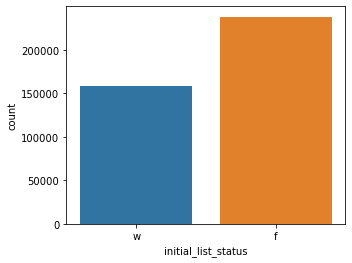

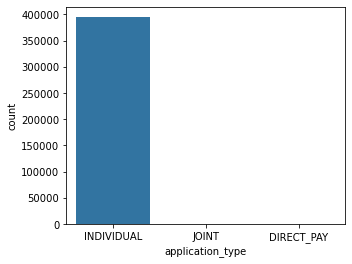

In [30]:
for i in cols_cat:
    if i != "earliest_cr_line" and i!= "issue_d":
        fig,axes =plt.subplots(1,1,figsize=(5,4))
        sns.countplot(df[i])


In [31]:
###Bivariant Analysis

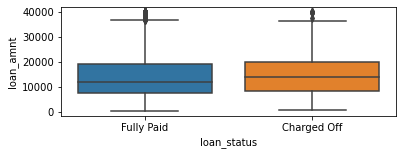

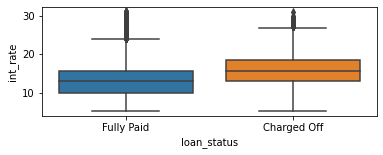

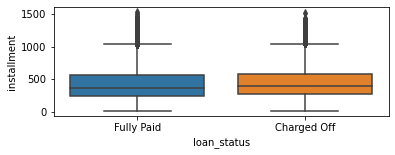

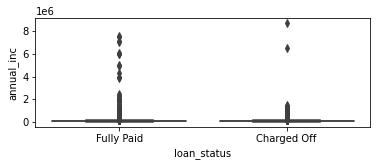

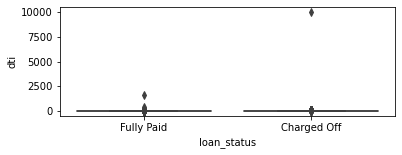

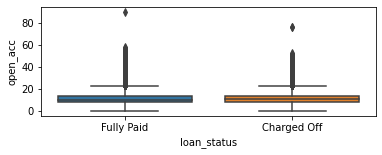

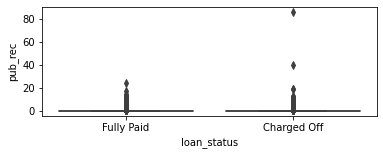

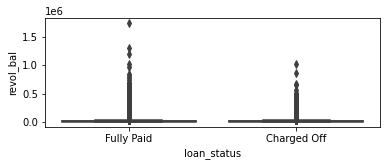

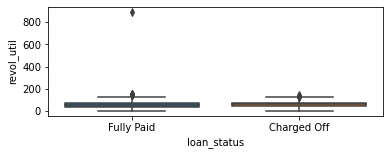

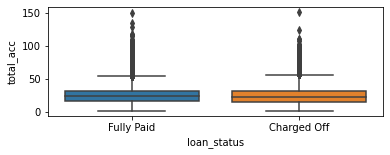

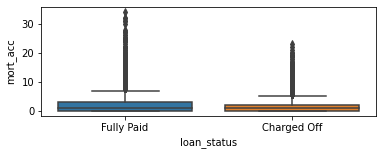

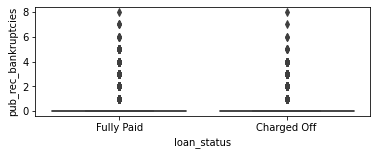

In [32]:
for i in cols_con:
    fig,axes = plt.subplots(1,1,figsize=(6,2))
    sns.boxplot(x=df['loan_status'], y=df[i])
    

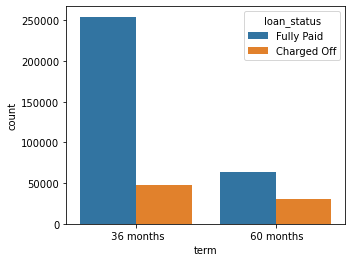

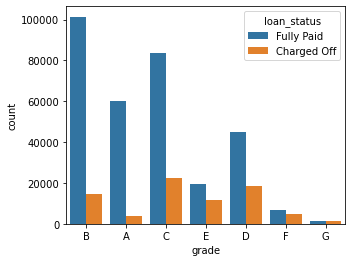

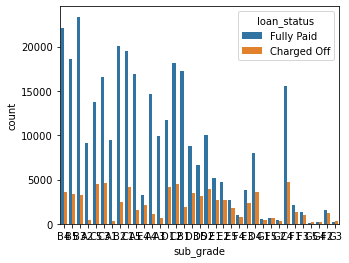

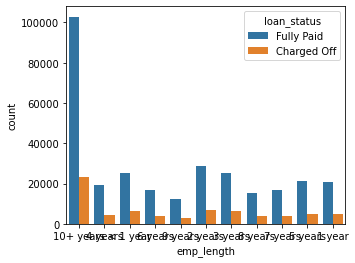

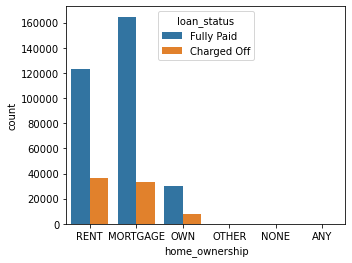

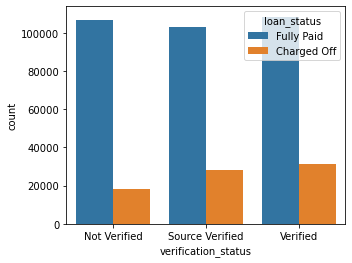

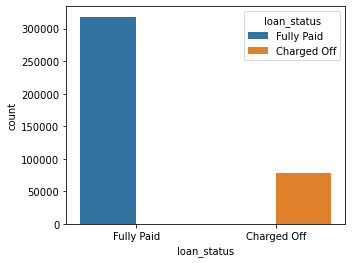

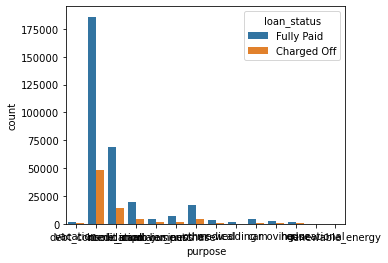

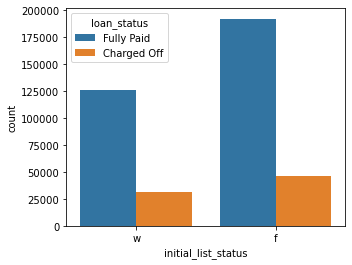

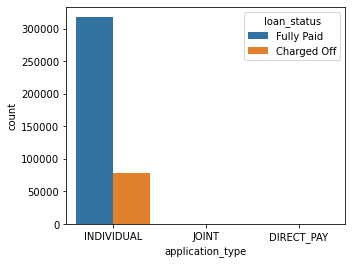

In [33]:
for i in cols_cat:
    if i != "earliest_cr_line" and i!= "issue_d":
        fig,axes =plt.subplots(1,1,figsize=(5,4))
        sns.countplot(x=df[i],hue=df['loan_status'])

In [34]:
###Finding to corelation between variables/columns of dataset


<AxesSubplot:>

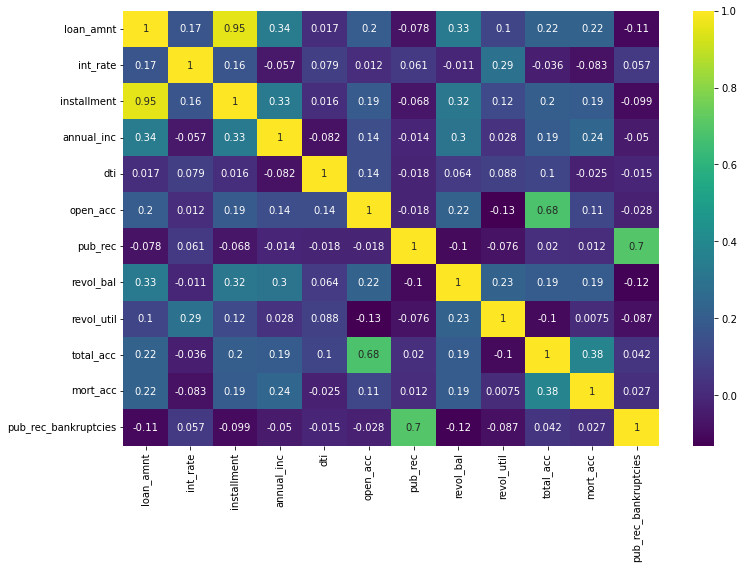

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [36]:
###Data Preprocessing

In [37]:
#NullCHECK

In [38]:
df.isna().sum()/df.count()*100

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_length               4.845008
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.069740
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.550337
pub_rec_bankruptcies     0.135274
dtype: float64

In [39]:
#AS revol_util,pub_rec_bankruptcies, have very few records with null values less than even 1% so can remove/drop these records

In [40]:
df = df.dropna(subset=['revol_util','pub_rec_bankruptcies'])

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [42]:
df['mort_acc'].describe()

count    358014.000000
mean          1.813792
std           2.147897
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [43]:

df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

In [44]:
df['mort_acc'].nunique()

33

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

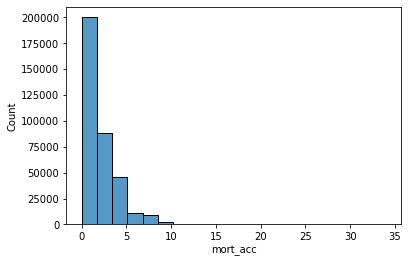

In [45]:
sns.histplot(df['mort_acc'],bins=20)

In [46]:
df['mort_acc']= df['mort_acc'].fillna(df['mort_acc'].median())
df.mort_acc.isna().sum()

0

<AxesSubplot:xlabel='emp_length', ylabel='count'>

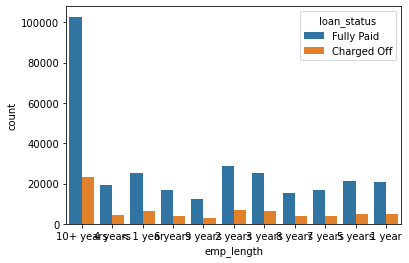

In [47]:
sns.countplot(x=df['emp_length'],hue=df['loan_status'])

In [48]:
print(df['emp_length'].mode())
df['emp_length'] = df['emp_length'].fillna('10+ years')
df['emp_length'].isna().sum()

0    10+ years
dtype: object


0

In [49]:
df.isna().sum()/df.count()*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [50]:
###checking duplicates of records
df.duplicated().sum()

0

In [51]:
###Outlier Removal
cols=list(cols_con)
Q1 = df[cols]. quantile(0.25)
Q3 = df[cols]. quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))). any(axis=1)]

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

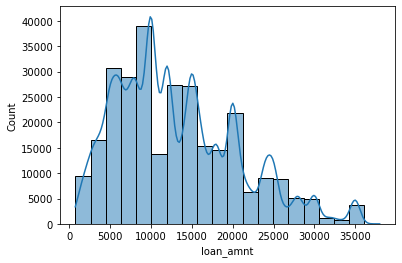

In [52]:
sns.histplot(df['loan_amnt'],bins= 20,kde=True)
df.columns

In [53]:
#As grade is a subset of subgrade, drop the grade feature
#As issue_d is the date when loan_amount is issued ill not have any influence on loan status we can remove this feature

#df= df.drop(columns=['grade','issue_d'])
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [54]:
df.info()
df['issue_d'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284654 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             284654 non-null  float64
 1   term                  284654 non-null  object 
 2   int_rate              284654 non-null  float64
 3   installment           284654 non-null  float64
 4   grade                 284654 non-null  object 
 5   sub_grade             284654 non-null  object 
 6   emp_length            284654 non-null  object 
 7   home_ownership        284654 non-null  object 
 8   annual_inc            284654 non-null  float64
 9   verification_status   284654 non-null  object 
 10  issue_d               284654 non-null  object 
 11  loan_status           284654 non-null  object 
 12  purpose               284654 non-null  object 
 13  dti                   284654 non-null  float64
 14  earliest_cr_line      284654 non-null  object 
 15  

Oct-2014    9839
Jul-2014    8658
Nov-2013    7855
Dec-2013    7781
Jan-2015    7715
            ... 
Jul-2008      56
May-2008      52
Aug-2008      43
Jun-2008      40
Sep-2008      19
Name: issue_d, Length: 106, dtype: int64

In [55]:

#issue_d feature do have a long string data...we will just keep the year 
df['issue_d']=pd.to_datetime(df['issue_d'])
df['issue_d']=df['issue_d'].dt.year
df['issue_d'].astype(int)


df.drop(columns=['grade'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284654 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             284654 non-null  float64
 1   term                  284654 non-null  object 
 2   int_rate              284654 non-null  float64
 3   installment           284654 non-null  float64
 4   sub_grade             284654 non-null  object 
 5   emp_length            284654 non-null  object 
 6   home_ownership        284654 non-null  object 
 7   annual_inc            284654 non-null  float64
 8   verification_status   284654 non-null  object 
 9   issue_d               284654 non-null  int64  
 10  loan_status           284654 non-null  object 
 11  purpose               284654 non-null  object 
 12  dti                   284654 non-null  float64
 13  earliest_cr_line      284654 non-null  object 
 14  open_acc              284654 non-null  float64
 15  

In [56]:
#earliest_cr_line feature do have a long string data...we will just keep the year 
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line']=df['earliest_cr_line'].dt.year
df['earliest_cr_line'].astype(int)

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396024    1991
396025    2004
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 284654, dtype: int32

In [57]:
#feature engineering
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [58]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [59]:
#LABEL ENCODING AND ONE HOT ENCODING


In [60]:
col=list(df.columns)
cols_cat=[]

for c in col:
    if df[c].dtype == "object":
        cols_cat.append(c)
print(cols_cat)


['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']


In [61]:
print(pd.DataFrame(ls))

            Name of col  unique val
0                  term           2
1                 grade           7
2             sub_grade          35
3             emp_title      173105
4            emp_length          11
5        home_ownership           6
6   verification_status           3
7               issue_d         115
8           loan_status           2
9               purpose          14
10                title       48817
11     earliest_cr_line         684
12  initial_list_status           2
13     application_type           3
14              address      393700


In [62]:
#Labelling loan status
df.loan_status.unique()
df['loan_status'] = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

In [63]:
#Labelling  term
df.term.unique()
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})


In [64]:
#ONE HOT ENCODING
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
'application_type', 'home_ownership', 'emp_length']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [65]:
df.shape

(284654, 83)

# Data Prepration for Modelling

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30, random_state=42)
print(train.shape)
print(test.shape)

(199257, 83)
(85397, 83)


In [67]:
x_train, y_train = train.drop('loan_status', axis=1), train.loan_status
x_test, y_test = test.drop('loan_status', axis=1), test.loan_status

199257
85397


C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

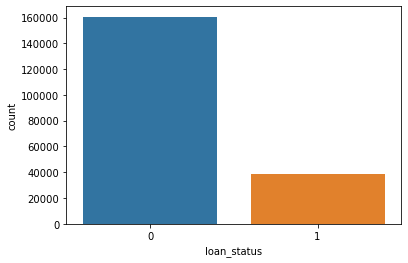

In [68]:
print(len(x_train))
print(len(x_test))
sns.countplot(y_train)


C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

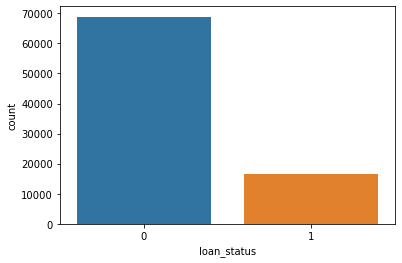

In [69]:
sns.countplot(y_test)

In [70]:
#Standarize the input X column

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)



In [72]:
from sklearn.linear_model import LogisticRegression
#Creating LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scale,y_train)
y_pred=lr.predict(x_test_scale)

### Metrics for model performance...calculate confusion matrix 

In [73]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_pred,y_test)
print(con_mat)

[[68037 15641]
 [  778   941]]


In [74]:
print(len(y_test))
print(len(x_test))

85397
85397


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     68815
           1       0.55      0.06      0.10     16582

    accuracy                           0.81     85397
   macro avg       0.68      0.52      0.50     85397
weighted avg       0.76      0.81      0.74     85397



### ROC and AUC

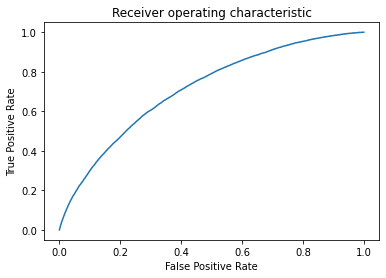

In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc=roc_auc_score(y_test,lr.predict(x_test_scale))
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test_scale)[:,1])
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.plot(fpr,tpr)


### Precision and Recall Curve 

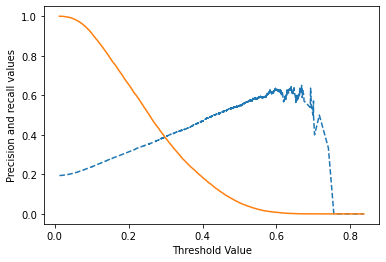

In [77]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test,y_pred_proba):
    precisions,recall,thresholds=precision_recall_curve(y_test,y_pred_proba)
    plt.xlabel('Threshold Value');
    plt.ylabel('Precision and recall values');

    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],label='precisions',linestyle='--')
    plt.plot(thresholds, recall[0:threshold_boundary], label='recalls')
    plt.show()
    
precision_recall_curve_plot(y_test, lr.predict_proba(x_test_scale)[:,1]) 

In [78]:
#Target variable is imbalance AS a result the recall value is biased and not good...
#use the concept of oversampling to balance the target variable loan_status

### Oversampling of target variable is needed

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2,sampling_strategy=0.5)
x_train_res,y_train_res=sm.fit_sample(x_train,y_train)


In [80]:
print("After Sampling shape of train_X is {} : ".format(x_train_res.shape))
print("After Sampling shape of train_Y is {}: ".format(y_train_res.shape))

print("After Sampling value of 1's in train_Y is {} : ".format(sum(y_train_res == 1)))
print("After Sampling value of 0's in train_Y is {}: ".format(sum(y_train_res == 0)))

After Sampling shape of train_X is (240811, 82) : 
After Sampling shape of train_Y is (240811,): 
After Sampling value of 1's in train_Y is 80270 : 
After Sampling value of 0's in train_Y is 160541: 


C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

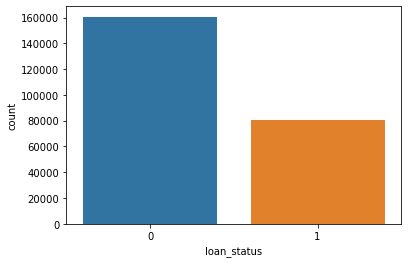

In [81]:
sns.countplot(y_train_res)

In [82]:


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_res_scale=scaler.fit_transform(x_train_res)


#Creating LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_res_scale,y_train_res)
y_pred_aftr=lr.predict(x_test_scale)
con_mat = confusion_matrix(y_pred_aftr,y_test)
print(con_mat)

[[42929  5823]
 [25886 10759]]


In [83]:
print(classification_report(y_test,y_pred_aftr))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73     68815
           1       0.29      0.65      0.40     16582

    accuracy                           0.63     85397
   macro avg       0.59      0.64      0.57     85397
weighted avg       0.77      0.63      0.67     85397



### Calculation of ROC, AUC and precision recall curve

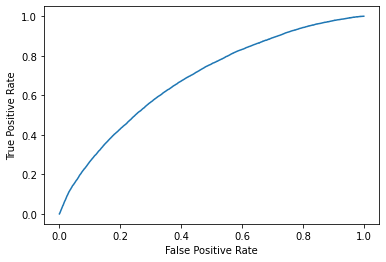

In [84]:
logit_roc_auc=roc_auc_score(y_test,lr.predict(x_test_scale))
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test_scale)[:,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)


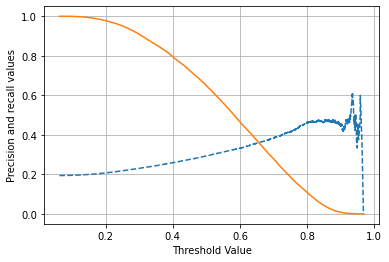

In [85]:
def precision_recall_curve_plot(y_test,y_pred_proba):
    precisions,recall,thresholds=precision_recall_curve(y_test,y_pred_proba)

    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],label='precisions',linestyle='--')
    plt.plot(thresholds,recall[0:threshold_boundary],label='recalls')

    plt.xlabel('Threshold Value');
    plt.ylabel('Precision and recall values');
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lr.predict_proba(x_test_scale)[:,1]) 